<a href="https://colab.research.google.com/github/Hari20032005/Qiskit_Deustch_Jozsa/blob/main/Qiskit_Deustch_Jozsa_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.0/8.0 MB 33.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 45.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 29.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 1.5 MB/s eta 0:00:00

===== CONSTANT ORACLE =====
⚠️ pylatexenc not found — showing text circuit instead.


┌───┐┌───┐┌─┐      
q_0: ┤ H ├┤ H ├┤M├──────
     ├───┤├───┤└╥┘┌─┐   
q_1: ┤ H ├┤ H ├─╫─┤M├───
     ├───┤├───┤ ║ └╥┘┌─┐
q_2: ┤ H ├┤ H ├─╫──╫─┤M├
     ├───┤├───┤ ║  ║ └╥┘
q_3: ┤ X ├┤ H ├─╫──╫──╫─
     └───┘└───┘ ║  ║  ║ 
c: 3/═══════════╩══╩══╩═
                0  1  2

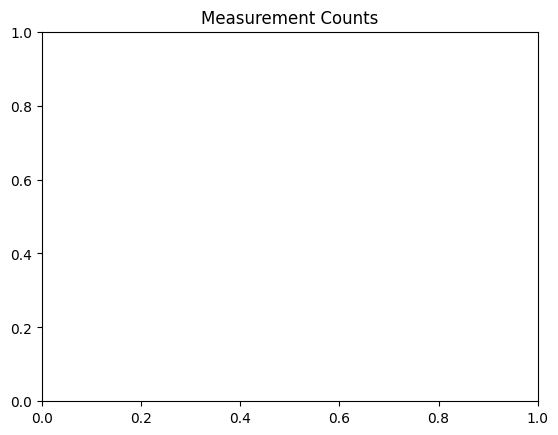

Counts (constant): {'000': 2048}
Expected output: 000 (all zeros)


===== BALANCED ORACLE (PARITY) =====
⚠️ pylatexenc not found — showing text circuit instead.


┌───┐          ┌───┐          ┌─┐   
q_0: ┤ H ├───────■──┤ H ├──────────┤M├───
     ├───┤┌───┐  │  └┬─┬┘          └╥┘   
q_1: ┤ H ├┤ H ├──┼───┤M├────────────╫────
     ├───┤└───┘  │   └╥┘      ┌───┐ ║ ┌─┐
q_2: ┤ H ├───────┼────╫────■──┤ H ├─╫─┤M├
     ├───┤┌───┐┌─┴─┐  ║  ┌─┴─┐└───┘ ║ └╥┘
q_3: ┤ X ├┤ H ├┤ X ├──╫──┤ X ├──────╫──╫─
     └───┘└───┘└───┘  ║  └───┘      ║  ║ 
c: 3/═════════════════╩═════════════╩══╩═
                      1             0  2

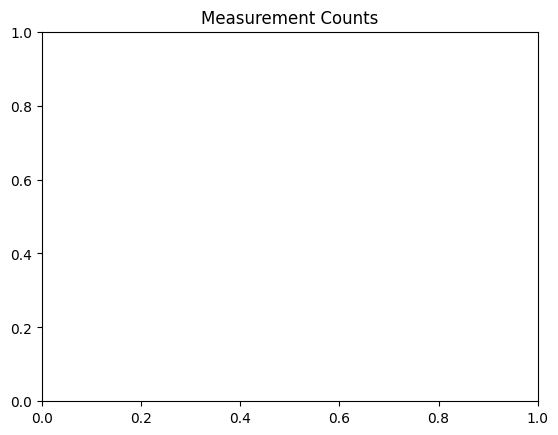

Counts (balanced/parity): {'101': 2048}
Expected output: non-zero pattern (like 101)


===== BALANCED ORACLE (CUSTOM XOR) =====
⚠️ pylatexenc not found — showing text circuit instead.


┌───┐          ┌───┐          ┌─┐   
q_0: ┤ H ├───────■──┤ H ├──────────┤M├───
     ├───┤       │  └───┘     ┌───┐└╥┘┌─┐
q_1: ┤ H ├───────┼─────────■──┤ H ├─╫─┤M├
     ├───┤┌───┐  │   ┌─┐   │  └───┘ ║ └╥┘
q_2: ┤ H ├┤ H ├──┼───┤M├───┼────────╫──╫─
     ├───┤├───┤┌─┴─┐ └╥┘ ┌─┴─┐      ║  ║ 
q_3: ┤ X ├┤ H ├┤ X ├──╫──┤ X ├──────╫──╫─
     └───┘└───┘└───┘  ║  └───┘      ║  ║ 
c: 3/═════════════════╩═════════════╩══╩═
                      2             0  1

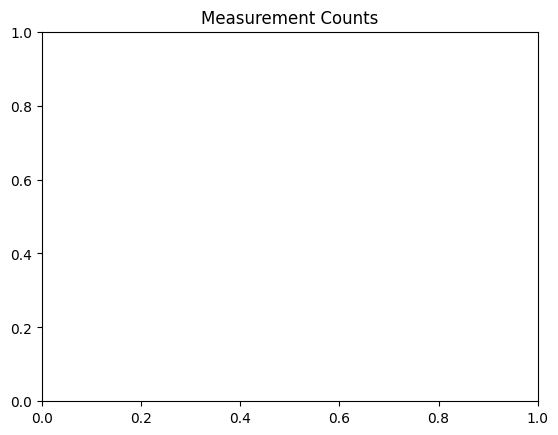

Counts (balanced/custom): {'011': 2048}
Expected output: non-zero bitstring (depends on XOR logic)


===== NOISE SIMULATION (optional) =====
⚠️ pylatexenc not found — showing text circuit instead.


┌───┐┌───┐┌─┐      
q_0: ┤ H ├┤ H ├┤M├──────
     ├───┤├───┤└╥┘┌─┐   
q_1: ┤ H ├┤ H ├─╫─┤M├───
     ├───┤├───┤ ║ └╥┘┌─┐
q_2: ┤ H ├┤ H ├─╫──╫─┤M├
     ├───┤├───┤ ║  ║ └╥┘
q_3: ┤ X ├┤ H ├─╫──╫──╫─
     └───┘└───┘ ║  ║  ║ 
c: 3/═══════════╩══╩══╩═
                0  1  2

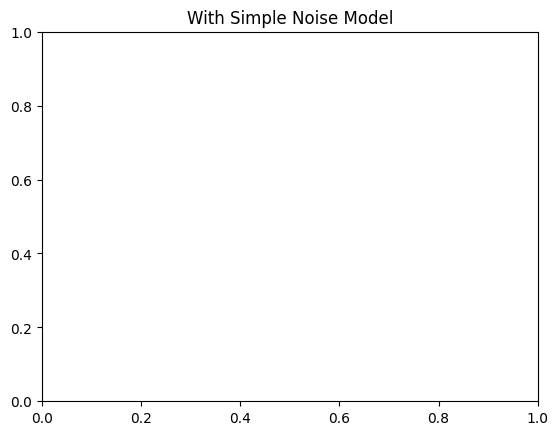

Noise model applied. Compare histogram with noiseless version.


In [1]:
# ============================================================
# 🧠 Qiskit Deutsch–Jozsa Algorithm — Colab-Ready Version (No pylatexenc required)
# ============================================================

!pip install qiskit qiskit-aer matplotlib -q

from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit_aer.noise import NoiseModel, depolarizing_error, ReadoutError
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt

# Try display(); fallback to print in non-notebook environments
try:
    from IPython.display import display
except Exception:
    display = print

# ------------------------------------------------------------
# 1️⃣ Oracle Definitions
# ------------------------------------------------------------
def oracle_constant(n: int, constant_value: int = 0):
    """Constant oracle: flips ancilla if constant_value == 1."""
    def apply_oracle(qc: QuantumCircuit, x_qubits: list[int], ancilla: int):
        if constant_value == 1:
            qc.x(ancilla)
    return apply_oracle


def oracle_balanced_parity(s_bits: list[int]):
    """Balanced oracle f(x) = s·x mod 2 (classic parity)."""
    if not any(s_bits):
        raise ValueError("Balanced parity oracle requires a non-zero s_bits.")
    def apply_oracle(qc: QuantumCircuit, x_qubits: list[int], ancilla: int):
        for i, b in enumerate(s_bits):
            if b == 1:
                qc.cx(x_qubits[i], ancilla)
    return apply_oracle


def oracle_balanced_custom():
    """Custom balanced oracle — flips on XOR(x0, x1)."""
    def apply_oracle(qc: QuantumCircuit, x_qubits: list[int], ancilla: int):
        if len(x_qubits) < 2:
            raise ValueError("custom balanced oracle requires n ≥ 2")
        qc.cx(x_qubits[0], ancilla)
        qc.cx(x_qubits[1], ancilla)
    return apply_oracle


# ------------------------------------------------------------
# 2️⃣ Deutsch–Jozsa Circuit Builder
# ------------------------------------------------------------
def deutsch_jozsa_circuit(n: int, oracle_func) -> QuantumCircuit:
    """Build Deutsch–Jozsa circuit with n inputs + 1 ancilla."""
    qc = QuantumCircuit(n + 1, n)
    x_qubits = list(range(n))
    ancilla = n

    qc.x(ancilla)               # |1>
    qc.h(x_qubits); qc.h(ancilla)
    oracle_func(qc, x_qubits, ancilla)
    qc.h(x_qubits)
    qc.measure(x_qubits, list(range(n)))
    return qc


# ------------------------------------------------------------
# 3️⃣ Safe Drawer + Simulator Runner (no pylatexenc errors)
# ------------------------------------------------------------
def _draw_circuit(qc):
    """Try mpl drawer; fallback to text if pylatexenc missing."""
    try:
        fig = qc.draw("mpl")
        display(fig)
    except Exception as e:
        print("⚠️ pylatexenc not found — showing text circuit instead.")
        display(qc.draw("text"))

def run_and_plot(qc, shots=2048, draw=True):
    sim = AerSimulator()
    tqc = transpile(qc, sim)
    result = sim.run(tqc, shots=shots).result()
    counts = result.get_counts()
    if draw:
        _draw_circuit(qc)
        plt.figure()
        plot_histogram(counts)
        plt.title("Measurement Counts")
        plt.show()
    return counts


# ------------------------------------------------------------
# 4️⃣ Simple Noise Model (for optional experiments)
# ------------------------------------------------------------
def make_simple_noise_model(p1=0.001, p2=0.01, p_readout=0.02):
    nm = NoiseModel()
    nm.add_all_qubit_quantum_error(depolarizing_error(p1, 1), ['x','h','id','measure'])
    nm.add_all_qubit_quantum_error(depolarizing_error(p2, 2), ['cx'])
    ro = ReadoutError([[1 - p_readout, p_readout],
                       [p_readout, 1 - p_readout]])
    nm.add_all_qubit_readout_error(ro)
    return nm

def run_with_noise(qc, shots=4096):
    sim = AerSimulator(noise_model=make_simple_noise_model())
    tqc = transpile(qc, sim)
    counts = sim.run(tqc, shots=shots).result().get_counts()
    _draw_circuit(qc)
    plt.figure()
    plot_histogram(counts)
    plt.title("With Simple Noise Model")
    plt.show()
    return counts


# ------------------------------------------------------------
# 5️⃣ Demonstrations
# ------------------------------------------------------------

# Constant oracle
print("\n===== CONSTANT ORACLE =====")
n = 3
const_oracle = oracle_constant(n, constant_value=0)
qc_const = deutsch_jozsa_circuit(n, const_oracle)
counts_const = run_and_plot(qc_const)
print("Counts (constant):", counts_const)
print("Expected output: 000 (all zeros)\n")

# Balanced (parity)
print("\n===== BALANCED ORACLE (PARITY) =====")
s_bits = [1, 0, 1]
balanced_parity = oracle_balanced_parity(s_bits)
qc_bal = deutsch_jozsa_circuit(n, balanced_parity)
counts_bal = run_and_plot(qc_bal)
print("Counts (balanced/parity):", counts_bal)
print("Expected output: non-zero pattern (like 101)\n")

# Balanced (custom XOR)
print("\n===== BALANCED ORACLE (CUSTOM XOR) =====")
custom_bal = oracle_balanced_custom()
qc_bal_custom = deutsch_jozsa_circuit(n, custom_bal)
counts_bal_custom = run_and_plot(qc_bal_custom)
print("Counts (balanced/custom):", counts_bal_custom)
print("Expected output: non-zero bitstring (depends on XOR logic)\n")

# Optional — Noise Simulation
print("\n===== NOISE SIMULATION (optional) =====")
_ = run_with_noise(qc_const)
print("Noise model applied. Compare histogram with noiseless version.")
